In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce

%matplotlib inline

## US total cats and dogs dataset from 2019 to 2021

In [2]:
# https://www.shelteranimalscount.org/

In [3]:
sac_dataset = pd.read_csv('../data/sac_aggregate_dataset_2019_2021.csv')
sac_dataset

,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,...,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2019,850,"1,786",32,67,68,"1,689",353,0,...,0,0,0,0,0,0,0,0,0,0
1,AK,2020,800,"1,404",61,51,68,"1,755",331,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,2021,743,"1,522",85,37,70,"1,886",289,1,...,0,0,0,0,0,0,0,0,0,0
3,AL,2019,"5,006","7,199",811,16,467,"7,582",140,744,...,494,"9,484","2,895",15,"5,927",1,310,27,111,"3,094"
4,AL,2020,"3,495","6,803",527,19,525,"6,816",140,747,...,413,"7,480","2,303",16,"6,483",5,253,21,63,"2,054"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,"1,208","5,146",30,0,85,"3,455",90,15,...,102,"2,916",919,1,"2,707",72,63,5,0,159
155,WV,2021,"1,588","6,060",524,0,166,"5,072",85,192,...,331,"5,306","1,459",2,"2,428",86,95,12,0,197
156,WY,2019,"1,080","1,874",364,26,"1,140","2,499",196,70,...,"1,735","1,975","1,467",1,114,752,28,0,65,159
157,WY,2020,819,"1,458",394,24,"1,112","2,184",155,72,...,750,"1,662","1,024",0,57,397,11,1,58,113


In [4]:
sac_dataset = sac_dataset[sac_dataset.State != 'VI']
sac_dataset = sac_dataset[sac_dataset.State != 'PR']
sac_dataset

,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,...,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2019,850,"1,786",32,67,68,"1,689",353,0,...,0,0,0,0,0,0,0,0,0,0
1,AK,2020,800,"1,404",61,51,68,"1,755",331,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,2021,743,"1,522",85,37,70,"1,886",289,1,...,0,0,0,0,0,0,0,0,0,0
3,AL,2019,"5,006","7,199",811,16,467,"7,582",140,744,...,494,"9,484","2,895",15,"5,927",1,310,27,111,"3,094"
4,AL,2020,"3,495","6,803",527,19,525,"6,816",140,747,...,413,"7,480","2,303",16,"6,483",5,253,21,63,"2,054"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,"1,208","5,146",30,0,85,"3,455",90,15,...,102,"2,916",919,1,"2,707",72,63,5,0,159
155,WV,2021,"1,588","6,060",524,0,166,"5,072",85,192,...,331,"5,306","1,459",2,"2,428",86,95,12,0,197
156,WY,2019,"1,080","1,874",364,26,"1,140","2,499",196,70,...,"1,735","1,975","1,467",1,114,752,28,0,65,159
157,WY,2020,819,"1,458",394,24,"1,112","2,184",155,72,...,750,"1,662","1,024",0,57,397,11,1,58,113


In [5]:
## changing multiple columns to integer

In [6]:
sac_dataset.dtypes

State                                                     object
Year                                                       int64
Intake - Relinquished By Owner Total-Feline               object
Intake - Stray At Large Total-Feline                      object
Intake - Transferred In Total-Feline                      object
Intake - Owner Intended Euthanasia Total-Feline           object
Intakes - Other Intakes Total-Feline                      object
Live Outcome - Adoption Total-Feline                      object
Live Outcome - Returned To Owner Total-Feline             object
Live Outcome - Returned To Field Total-Feline             object
Live Outcome - Transferred Out Total-Feline               object
Live outcome - Other Live Outcome Total-Feline            object
Other Outcome - Died In Care Total-Feline                 object
Other Outcome - Lost In Care Total-Feline                  int64
Other Outcome - Owner Intended Euthanasia Total-Feline    object
Other Outcome - Shelter E

In [7]:
dict_columns = {'Year': str, 'Intake - Relinquished By Owner Total-Feline': int,
               'Intake - Stray At Large Total-Feline': int,
               'Intake - Transferred In Total-Feline': int,
               'Intake - Owner Intended Euthanasia Total-Feline': int,
               'Intakes - Other Intakes Total-Feline': int,
               'Live Outcome - Adoption Total-Feline': int,
               'Live Outcome - Returned To Owner Total-Feline': int,
               'Live Outcome - Returned To Field Total-Feline': int,
               'Live Outcome - Transferred Out Total-Feline': int,
               'Live outcome - Other Live Outcome Total-Feline': int,
               'Other Outcome - Died In Care Total-Feline': int,
               'Other Outcome - Owner Intended Euthanasia Total-Feline': int,
               'Other Outcome - Shelter Euthanasia Total-Feline': int,
               'Intake - Relinquished By Owner Total-Canine': int,
               'Intake - Stray At Large Total-Canine': int,
               'Intake - Transferred In Total-Canine': int,
               'Live Outcome - Adoption Total-Canine': int,
               'Live Outcome - Returned To Owner Total-Canine': int,
               'Live Outcome - Transferred Out Total-Canine': int,
               'Live outcome - Other Live Outcome Total-Canine': int,
               'Other Outcome - Died In Care Total-Canine': int,
               'Live Outcome - Transferred Out Total-Canine': int,
               'Live outcome - Other Live Outcome Total-Canine': int,
               'Other Outcome - Died In Care Total-Canine': int,
               'Other Outcome - Owner Intended Euthanasia Total-Canine': int,
               'Other Outcome - Shelter Euthanasia Total-Canine': int,
               'Intakes - Other Intakes Total-Canine': int,
               'Intake - Owner Intended Euthanasia Total-Canine': int}

sac_dataset = sac_dataset.replace(',','',regex= True).astype(dict_columns)
sac_dataset.dtypes

State                                                     object
Year                                                      object
Intake - Relinquished By Owner Total-Feline                int32
Intake - Stray At Large Total-Feline                       int32
Intake - Transferred In Total-Feline                       int32
Intake - Owner Intended Euthanasia Total-Feline            int32
Intakes - Other Intakes Total-Feline                       int32
Live Outcome - Adoption Total-Feline                       int32
Live Outcome - Returned To Owner Total-Feline              int32
Live Outcome - Returned To Field Total-Feline              int32
Live Outcome - Transferred Out Total-Feline                int32
Live outcome - Other Live Outcome Total-Feline             int32
Other Outcome - Died In Care Total-Feline                  int32
Other Outcome - Lost In Care Total-Feline                  int64
Other Outcome - Owner Intended Euthanasia Total-Feline     int32
Other Outcome - Shelter E

## Dividing sac_dataset into felines and canines

# FELINE tables

In [8]:
sac_feline = sac_dataset[['State',
    'Year',                                                       
    'Intake - Relinquished By Owner Total-Feline',               
    'Intake - Stray At Large Total-Feline',                      
    'Intake - Transferred In Total-Feline',                      
    'Intake - Owner Intended Euthanasia Total-Feline',           
    'Intakes - Other Intakes Total-Feline',                      
    'Live Outcome - Adoption Total-Feline',                     
    'Live Outcome - Returned To Owner Total-Feline',             
    'Live Outcome - Returned To Field Total-Feline',            
    'Live Outcome - Transferred Out Total-Feline',             
    'Live outcome - Other Live Outcome Total-Feline',         
    'Other Outcome - Died In Care Total-Feline',                 
    'Other Outcome - Lost In Care Total-Feline',              
    'Other Outcome - Owner Intended Euthanasia Total-Feline',
    'Other Outcome - Shelter Euthanasia Total-Feline']]

sac_feline

,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,Live Outcome - Transferred Out Total-Feline,Live outcome - Other Live Outcome Total-Feline,Other Outcome - Died In Care Total-Feline,Other Outcome - Lost In Care Total-Feline,Other Outcome - Owner Intended Euthanasia Total-Feline,Other Outcome - Shelter Euthanasia Total-Feline
0,AK,2019,850,1786,32,67,68,1689,353,0,25,0,56,2,68,477
1,AK,2020,800,1404,61,51,68,1755,331,0,38,0,60,5,50,155
2,AK,2021,743,1522,85,37,70,1886,289,1,69,0,98,0,38,57
3,AL,2019,5006,7199,811,16,467,7582,140,744,1104,0,423,31,21,2663
4,AL,2020,3495,6803,527,19,525,6816,140,747,1139,0,272,35,14,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,1208,5146,30,0,85,3455,90,15,1767,86,362,33,1,630
155,WV,2021,1588,6060,524,0,166,5072,85,192,1854,65,503,0,1,581
156,WY,2019,1080,1874,364,26,1140,2499,196,70,241,724,115,4,29,476
157,WY,2020,819,1458,394,24,1112,2184,155,72,187,745,45,4,23,218


In [9]:
## all columns are all total by state and by year, separated by animal type, cleanning the titles - too long

In [10]:
sac_feline = sac_feline.rename(columns = {'State':'state', 'Year':'year',
                                  'Intake - Relinquished By Owner Total-Feline':'surrendered_by_owner',
                                  'Intake - Stray At Large Total-Feline':'stray',
                                  'Intake - Transferred In Total-Feline':'transferred_in',
                                  'Intake - Owner Intended Euthanasia Total-Feline':'intake_owner_euthanasia',
                                  'Intakes - Other Intakes Total-Feline':'other_intakes',
                                  'Live Outcome - Adoption Total-Feline':'adoption',
                                  'Live Outcome - Returned To Owner Total-Feline':'returned_to_owner',
                                  'Live Outcome - Returned To Field Total-Feline':'returned_to_field',
                                  'Live Outcome - Transferred Out Total-Feline':'transferred_out',
                                  'Live outcome - Other Live Outcome Total-Feline':'others_live_outcome',
                                  'Other Outcome - Died In Care Total-Feline':'died_in_care',
                                  'Other Outcome - Lost In Care Total-Feline':'lost_in_care',
                                  'Other Outcome - Owner Intended Euthanasia Total-Feline':'other_owner_euthanasia',
                                  'Other Outcome - Shelter Euthanasia Total-Feline':'shelter_euthanasia'})

sac_feline

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia
0,AK,2019,850,1786,32,67,68,1689,353,0,25,0,56,2,68,477
1,AK,2020,800,1404,61,51,68,1755,331,0,38,0,60,5,50,155
2,AK,2021,743,1522,85,37,70,1886,289,1,69,0,98,0,38,57
3,AL,2019,5006,7199,811,16,467,7582,140,744,1104,0,423,31,21,2663
4,AL,2020,3495,6803,527,19,525,6816,140,747,1139,0,272,35,14,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,1208,5146,30,0,85,3455,90,15,1767,86,362,33,1,630
155,WV,2021,1588,6060,524,0,166,5072,85,192,1854,65,503,0,1,581
156,WY,2019,1080,1874,364,26,1140,2499,196,70,241,724,115,4,29,476
157,WY,2020,819,1458,394,24,1112,2184,155,72,187,745,45,4,23,218


## FELINE rates - surrended, stray, and others per year, per state

In [11]:
sac_feline['feline_total_in_shelter'] = sac_feline['surrendered_by_owner'] + sac_feline['stray'] + sac_feline['transferred_in'] + sac_feline['transferred_out'] + sac_feline['other_intakes']
sac_feline

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,feline_total_in_shelter
0,AK,2019,850,1786,32,67,68,1689,353,0,25,0,56,2,68,477,2761
1,AK,2020,800,1404,61,51,68,1755,331,0,38,0,60,5,50,155,2371
2,AK,2021,743,1522,85,37,70,1886,289,1,69,0,98,0,38,57,2489
3,AL,2019,5006,7199,811,16,467,7582,140,744,1104,0,423,31,21,2663,14587
4,AL,2020,3495,6803,527,19,525,6816,140,747,1139,0,272,35,14,1456,12489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,1208,5146,30,0,85,3455,90,15,1767,86,362,33,1,630,8236
155,WV,2021,1588,6060,524,0,166,5072,85,192,1854,65,503,0,1,581,10192
156,WY,2019,1080,1874,364,26,1140,2499,196,70,241,724,115,4,29,476,4699
157,WY,2020,819,1458,394,24,1112,2184,155,72,187,745,45,4,23,218,3970


## what is the number of adoption or returned to owner per year per state

In [12]:
sac_feline['feline_total_adoption'] = sac_feline['adoption'] + sac_feline['returned_to_owner'] + sac_feline['others_live_outcome']
sac_feline

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,feline_total_in_shelter,feline_total_adoption
0,AK,2019,850,1786,32,67,68,1689,353,0,25,0,56,2,68,477,2761,2042
1,AK,2020,800,1404,61,51,68,1755,331,0,38,0,60,5,50,155,2371,2086
2,AK,2021,743,1522,85,37,70,1886,289,1,69,0,98,0,38,57,2489,2175
3,AL,2019,5006,7199,811,16,467,7582,140,744,1104,0,423,31,21,2663,14587,7722
4,AL,2020,3495,6803,527,19,525,6816,140,747,1139,0,272,35,14,1456,12489,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,1208,5146,30,0,85,3455,90,15,1767,86,362,33,1,630,8236,3631
155,WV,2021,1588,6060,524,0,166,5072,85,192,1854,65,503,0,1,581,10192,5222
156,WY,2019,1080,1874,364,26,1140,2499,196,70,241,724,115,4,29,476,4699,3419
157,WY,2020,819,1458,394,24,1112,2184,155,72,187,745,45,4,23,218,3970,3084


## what is the number of euthanasia per year and per state

In [13]:
sac_feline['feline_total_euthanasia'] = sac_feline['intake_owner_euthanasia'] + sac_feline['other_owner_euthanasia'] + sac_feline['shelter_euthanasia']
sac_feline

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,AK,2019,850,1786,32,67,68,1689,353,0,25,0,56,2,68,477,2761,2042,612
1,AK,2020,800,1404,61,51,68,1755,331,0,38,0,60,5,50,155,2371,2086,256
2,AK,2021,743,1522,85,37,70,1886,289,1,69,0,98,0,38,57,2489,2175,132
3,AL,2019,5006,7199,811,16,467,7582,140,744,1104,0,423,31,21,2663,14587,7722,2700
4,AL,2020,3495,6803,527,19,525,6816,140,747,1139,0,272,35,14,1456,12489,6956,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,1208,5146,30,0,85,3455,90,15,1767,86,362,33,1,630,8236,3631,631
155,WV,2021,1588,6060,524,0,166,5072,85,192,1854,65,503,0,1,581,10192,5222,582
156,WY,2019,1080,1874,364,26,1140,2499,196,70,241,724,115,4,29,476,4699,3419,531
157,WY,2020,819,1458,394,24,1112,2184,155,72,187,745,45,4,23,218,3970,3084,265


## totals for adoption, euthanasia, and in_shelter per state and per year

In [14]:
sac_totals_feline = sac_feline[['state', 'year', 'feline_total_in_shelter', 'feline_total_adoption', 'feline_total_euthanasia']]
sac_totals_feline

,state,year,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,AK,2019,2761,2042,612
1,AK,2020,2371,2086,256
2,AK,2021,2489,2175,132
3,AL,2019,14587,7722,2700
4,AL,2020,12489,6956,1489
...,...,...,...,...,...
154,WV,2020,8236,3631,631
155,WV,2021,10192,5222,582
156,WY,2019,4699,3419,531
157,WY,2020,3970,3084,265


## What are total adoption, euthanasia, and in shelter animals for 2019, 2020, and 2021?

In [15]:
sac_by_year_f = sac_totals_feline.groupby(['year']).sum()
sac_by_year_f = sac_by_year_f.reset_index()
sac_by_year_f

,year,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,2019,1322690,786847,192009
1,2020,1096593,694643,103008
2,2021,1159289,733742,106355


In [16]:
sac_tx_f = sac_feline[sac_feline['state'] == 'TX']
sac_tx_f = sac_tx_f[['state', 'year', 'feline_total_in_shelter', 'feline_total_adoption', 'feline_total_euthanasia']]
sac_tx_f

,state,year,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
132,TX,2019,113147,52951,15410
133,TX,2020,100217,48925,5675
134,TX,2021,96971,52133,6167


# ---------------------------------------------------------------------------------------------------------

# CANINE tables

In [17]:
sac_canine = sac_dataset[['State', 'Year',
    'Intake - Relinquished By Owner Total-Canine',              
    'Intake - Stray At Large Total-Canine',                 
    'Intake - Transferred In Total-Canine',                     
    'Intake - Owner Intended Euthanasia Total-Canine',        
    'Intakes - Other Intakes Total-Canine',                   
    'Live Outcome - Adoption Total-Canine',                    
    'Live Outcome - Returned To Owner Total-Canine',           
    'Live Outcome - Returned To Field Total-Canine',         
    'Live Outcome - Transferred Out Total-Canine',               
    'Live outcome - Other Live Outcome Total-Canine',         
    'Other Outcome - Died In Care Total-Canine',                 
    'Other Outcome - Lost In Care Total-Canine',                  
    'Other Outcome - Owner Intended Euthanasia Total-Canine',  
    'Other Outcome - Shelter Euthanasia Total-Canine']]

sac_canine

,State,Year,Intake - Relinquished By Owner Total-Canine,Intake - Stray At Large Total-Canine,Intake - Transferred In Total-Canine,Intake - Owner Intended Euthanasia Total-Canine,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AL,2019,6383,13978,1784,113,494,9484,2895,15,5927,1,310,27,111,3094
4,AL,2020,5919,10502,2159,67,413,7480,2303,16,6483,5,253,21,63,2054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,2250,4109,172,9,102,2916,919,1,2707,72,63,5,0,159
155,WV,2021,2605,5049,1781,1,331,5306,1459,2,2428,86,95,12,0,197
156,WY,2019,831,1112,779,60,1735,1975,1467,1,114,752,28,0,65,159
157,WY,2020,526,1102,804,58,750,1662,1024,0,57,397,11,1,58,113


In [18]:
## all columns are all total by state and by year, separated by animal type, cleanning the titles - too long

In [19]:
sac_canine = sac_canine.rename(columns = {'State':'state', 'Year':'year',
                                  'Intake - Relinquished By Owner Total-Canine':'surrendered_by_owner',
                                  'Intake - Stray At Large Total-Canine':'stray',
                                  'Intake - Transferred In Total-Canine':'transferred_in',
                                  'Intake - Owner Intended Euthanasia Total-Canine':'intake_owner_euthanasia',
                                  'Intakes - Other Intakes Total-Canine':'other_intakes',
                                  'Live Outcome - Adoption Total-Canine':'adoption',
                                  'Live Outcome - Returned To Owner Total-Canine':'returned_to_owner',
                                  'Live Outcome - Returned To Field Total-Canine':'returned_to_field',
                                  'Live Outcome - Transferred Out Total-Canine':'transferred_out',
                                  'Live outcome - Other Live Outcome Total-Canine':'others_live_outcome',
                                  'Other Outcome - Died In Care Total-Canine':'died_in_care',
                                  'Other Outcome - Lost In Care Total-Canine':'lost_in_care',
                                  'Other Outcome - Owner Intended Euthanasia Total-Canine':'other_owner_euthanasia',
                                  'Other Outcome - Shelter Euthanasia Total-Canine':'shelter_euthanasia'})

sac_canine

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia
0,AK,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AL,2019,6383,13978,1784,113,494,9484,2895,15,5927,1,310,27,111,3094
4,AL,2020,5919,10502,2159,67,413,7480,2303,16,6483,5,253,21,63,2054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,2250,4109,172,9,102,2916,919,1,2707,72,63,5,0,159
155,WV,2021,2605,5049,1781,1,331,5306,1459,2,2428,86,95,12,0,197
156,WY,2019,831,1112,779,60,1735,1975,1467,1,114,752,28,0,65,159
157,WY,2020,526,1102,804,58,750,1662,1024,0,57,397,11,1,58,113


### what is the rate of dog surrended, stray, and others per year per state

In [20]:
sac_canine['canine_total_in_shelter'] = sac_canine['surrendered_by_owner'] + sac_canine['stray'] + sac_canine['transferred_in'] + sac_canine['transferred_out'] + sac_canine['other_intakes']
sac_canine

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,canine_total_in_shelter
0,AK,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AL,2019,6383,13978,1784,113,494,9484,2895,15,5927,1,310,27,111,3094,28566
4,AL,2020,5919,10502,2159,67,413,7480,2303,16,6483,5,253,21,63,2054,25476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,2250,4109,172,9,102,2916,919,1,2707,72,63,5,0,159,9340
155,WV,2021,2605,5049,1781,1,331,5306,1459,2,2428,86,95,12,0,197,12194
156,WY,2019,831,1112,779,60,1735,1975,1467,1,114,752,28,0,65,159,4571
157,WY,2020,526,1102,804,58,750,1662,1024,0,57,397,11,1,58,113,3239


###  what is the number of adoption or returned to owner per year per state

In [21]:
sac_canine['canine_total_adoption'] = sac_canine['adoption'] + sac_canine['returned_to_owner'] + sac_canine['others_live_outcome']
sac_canine

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,canine_total_in_shelter,canine_total_adoption
0,AK,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AL,2019,6383,13978,1784,113,494,9484,2895,15,5927,1,310,27,111,3094,28566,12380
4,AL,2020,5919,10502,2159,67,413,7480,2303,16,6483,5,253,21,63,2054,25476,9788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,2250,4109,172,9,102,2916,919,1,2707,72,63,5,0,159,9340,3907
155,WV,2021,2605,5049,1781,1,331,5306,1459,2,2428,86,95,12,0,197,12194,6851
156,WY,2019,831,1112,779,60,1735,1975,1467,1,114,752,28,0,65,159,4571,4194
157,WY,2020,526,1102,804,58,750,1662,1024,0,57,397,11,1,58,113,3239,3083


### what is the number of euthanasia per year and per state

In [22]:
sac_canine['canine_total_euthanasia'] = sac_canine['intake_owner_euthanasia'] + sac_canine['other_owner_euthanasia'] + sac_canine['shelter_euthanasia']
sac_canine

,state,year,surrendered_by_owner,stray,transferred_in,intake_owner_euthanasia,other_intakes,adoption,returned_to_owner,returned_to_field,transferred_out,others_live_outcome,died_in_care,lost_in_care,other_owner_euthanasia,shelter_euthanasia,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia
0,AK,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AL,2019,6383,13978,1784,113,494,9484,2895,15,5927,1,310,27,111,3094,28566,12380,3318
4,AL,2020,5919,10502,2159,67,413,7480,2303,16,6483,5,253,21,63,2054,25476,9788,2184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,WV,2020,2250,4109,172,9,102,2916,919,1,2707,72,63,5,0,159,9340,3907,168
155,WV,2021,2605,5049,1781,1,331,5306,1459,2,2428,86,95,12,0,197,12194,6851,198
156,WY,2019,831,1112,779,60,1735,1975,1467,1,114,752,28,0,65,159,4571,4194,284
157,WY,2020,526,1102,804,58,750,1662,1024,0,57,397,11,1,58,113,3239,3083,229


## totals for adoption, euthanasia, and in_shelter per state and per year

In [23]:
sac_totals_canine = sac_canine[['state', 'year', 'canine_total_in_shelter', 'canine_total_adoption', 'canine_total_euthanasia']]
sac_totals_canine

,state,year,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia
0,AK,2019,0,0,0
1,AK,2020,0,0,0
2,AK,2021,0,0,0
3,AL,2019,28566,12380,3318
4,AL,2020,25476,9788,2184
...,...,...,...,...,...
154,WV,2020,9340,3907,168
155,WV,2021,12194,6851,198
156,WY,2019,4571,4194,284
157,WY,2020,3239,3083,229


In [24]:
## explain why did you chose  certain columns to get the total, like the column total_doption where we did not added the "transferred out" as adoption. 

In [25]:
sac_by_year_c = sac_totals_canine.groupby(['year']).sum()
sac_by_year_c = sac_by_year_c.reset_index()
sac_by_year_c

,year,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia
0,2019,1402984,889118,160591
1,2020,1079596,687007,103779
2,2021,1102766,700516,106951


### graph for TX data

In [26]:
sac_tx_c = sac_canine[sac_canine['state'] == 'TX']
sac_tx_c = sac_tx_c[['state', 'year', 'canine_total_in_shelter', 'canine_total_adoption', 'canine_total_euthanasia']]
sac_tx_c = sac_tx_c.rename(columns= {'Animal ID': 'Austin Euthanized Age Count'})

No handles with labels found to put in legend.


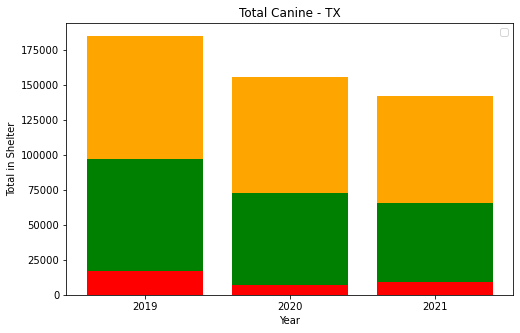

In [27]:
plt.figure(figsize=(8,5))
plt.bar('year', 'canine_total_in_shelter', data = sac_tx_c, color = 'orange')
plt.bar('year', 'canine_total_adoption', data = sac_tx_c, color = 'green')
plt.bar('year', 'canine_total_euthanasia', data = sac_tx_c, color = 'red' )
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total in Shelter')
plt.title('Total Canine - TX');

# MERGED DATAFRAMES

In [28]:
tx_f_c = pd.merge(sac_tx_c, sac_tx_f, on= ('state', 'year'), how= 'outer')
tx_f_c

,state,year,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,TX,2019,184966,96738,16842,113147,52951,15410
1,TX,2020,155704,72406,7246,100217,48925,5675
2,TX,2021,142282,65673,9071,96971,52133,6167


In [29]:
tx_f_c.to_csv('../data/tx_f_c.csv', index=False)

In [30]:
sac_year_f_c = pd.merge(sac_by_year_c, sac_by_year_f, on= 'year', how= 'outer')
sac_year_f_c

,year,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,2019,1402984,889118,160591,1322690,786847,192009
1,2020,1079596,687007,103779,1096593,694643,103008
2,2021,1102766,700516,106951,1159289,733742,106355


In [31]:
sac_year_f_c.to_csv('../data/sac_year_f_c.csv', index=False)

In [32]:
sac_totals_f_c = pd.merge(sac_totals_canine, sac_totals_feline, on= ('state', 'year'), how='outer')
sac_totals_f_c

,state,year,canine_total_in_shelter,canine_total_adoption,canine_total_euthanasia,feline_total_in_shelter,feline_total_adoption,feline_total_euthanasia
0,AK,2019,0,0,0,2761,2042,612
1,AK,2020,0,0,0,2371,2086,256
2,AK,2021,0,0,0,2489,2175,132
3,AL,2019,28566,12380,3318,14587,7722,2700
4,AL,2020,25476,9788,2184,12489,6956,1489
...,...,...,...,...,...,...,...,...
148,WV,2020,9340,3907,168,8236,3631,631
149,WV,2021,12194,6851,198,10192,5222,582
150,WY,2019,4571,4194,284,4699,3419,531
151,WY,2020,3239,3083,229,3970,3084,265


In [33]:
sac_totals_f_c.to_csv('../data/sac_totals_f_c.csv', index=False)